(326, 651, 4)

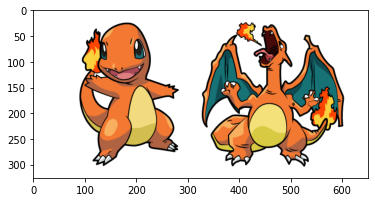

In [1]:
import numpy as np
from matplotlib import image
import matplotlib.pyplot as plt
from scipy import stats
im = image.imread('/content/charizard2.png') #RGB and Transparancy
plt.imshow(im)
im.shape

In [2]:
rm = stats.mode(im[:100,:100,0].ravel())
gm = stats.mode(im[:100,:100,1].ravel())
bm = stats.mode(im[:100,:100,2].ravel())
tm = stats.mode(im[:100,:100,3].ravel())
print(rm[0],gm[0],bm[0],tm[0])

[0.] [0.] [0.] [0.]


(426, 751, 4)

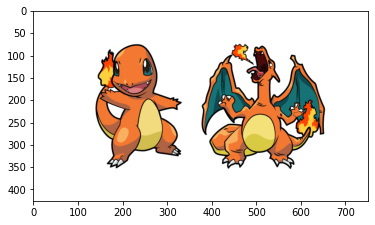

In [3]:
pad = np.pad(im, ((50, 50), (50, 50),(0,0)),'constant')
plt.imshow(pad)
pad.shape

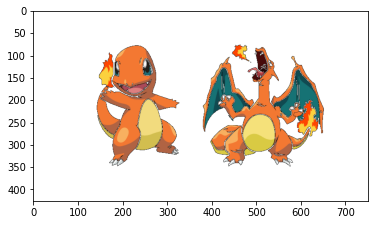

In [4]:

pad[pad[:,:,0] == rm[0]] = 0.
pad[pad[:,:,1] == gm[0]] = 0.
pad[pad[:,:,2] == bm[0]] = 0.
pad[pad[:,:,2] == tm[0]] = 0. #no transparency
plt.imshow(pad)

In [33]:
rs = pad[::4,::4,:]
rs.shape

(107, 188, 4)

In [6]:
ypix_x = np.arange(0)
ypix_y = np.arange(0)
for ix,x in enumerate(rs[:,0,0]):
  for iy,y in enumerate(rs[ix,:,0]):
    xi = ix-1
    xii = xi+1
    yi = iy-1
    yii = yi+1

    if rs[ix,yi,0] == 0.0 and rs[ix,yii,0] != 0.0: #upward transition
     ypix_x = np.append(ypix_x,[ix])
     ypix_y = np.append(ypix_y,[iy])
    if rs[ix,yi,0] != 0.0 and rs[ix,yii,0] == 0.0: #downward trasition
     ypix_x = np.append(ypix_x,[ix])
     ypix_y = np.append(ypix_y,[iy])

across_cords = list(zip(ypix_x,ypix_y))

In [7]:
xpix_x = np.arange(0)
xpix_y = np.arange(0)
for iy,x in enumerate(rs[0,:,0]):
  for ix,y in enumerate(rs[:,iy,0]):
    xi = ix-1
    xii = xi+1
    yi = iy-1
    yii = yi+1

    if rs[xi,yi,0] == 0.0 and rs[xii,iy,0] != 0.0: #upward transition
     xpix_x = np.append(xpix_x,[ix])
     xpix_y = np.append(xpix_y,[iy])
    if rs[xi,yi,0] != 0.0 and rs[xii,iy,0] == 0.0: #downward trasition
     xpix_x = np.append(xpix_x,[ix])
     xpix_y = np.append(xpix_y,[iy])

down_cords = list(zip(xpix_x,xpix_y))

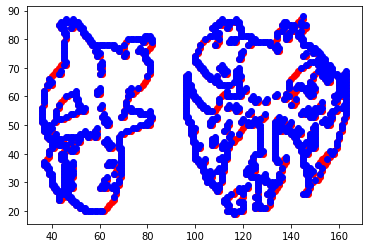

In [29]:
a = np.array(across_cords)
b = np.array(down_cords)
plt.scatter(a[:,1],a[:,0],c='red')
plt.scatter(b[:,1],b[:,0],c='blue')

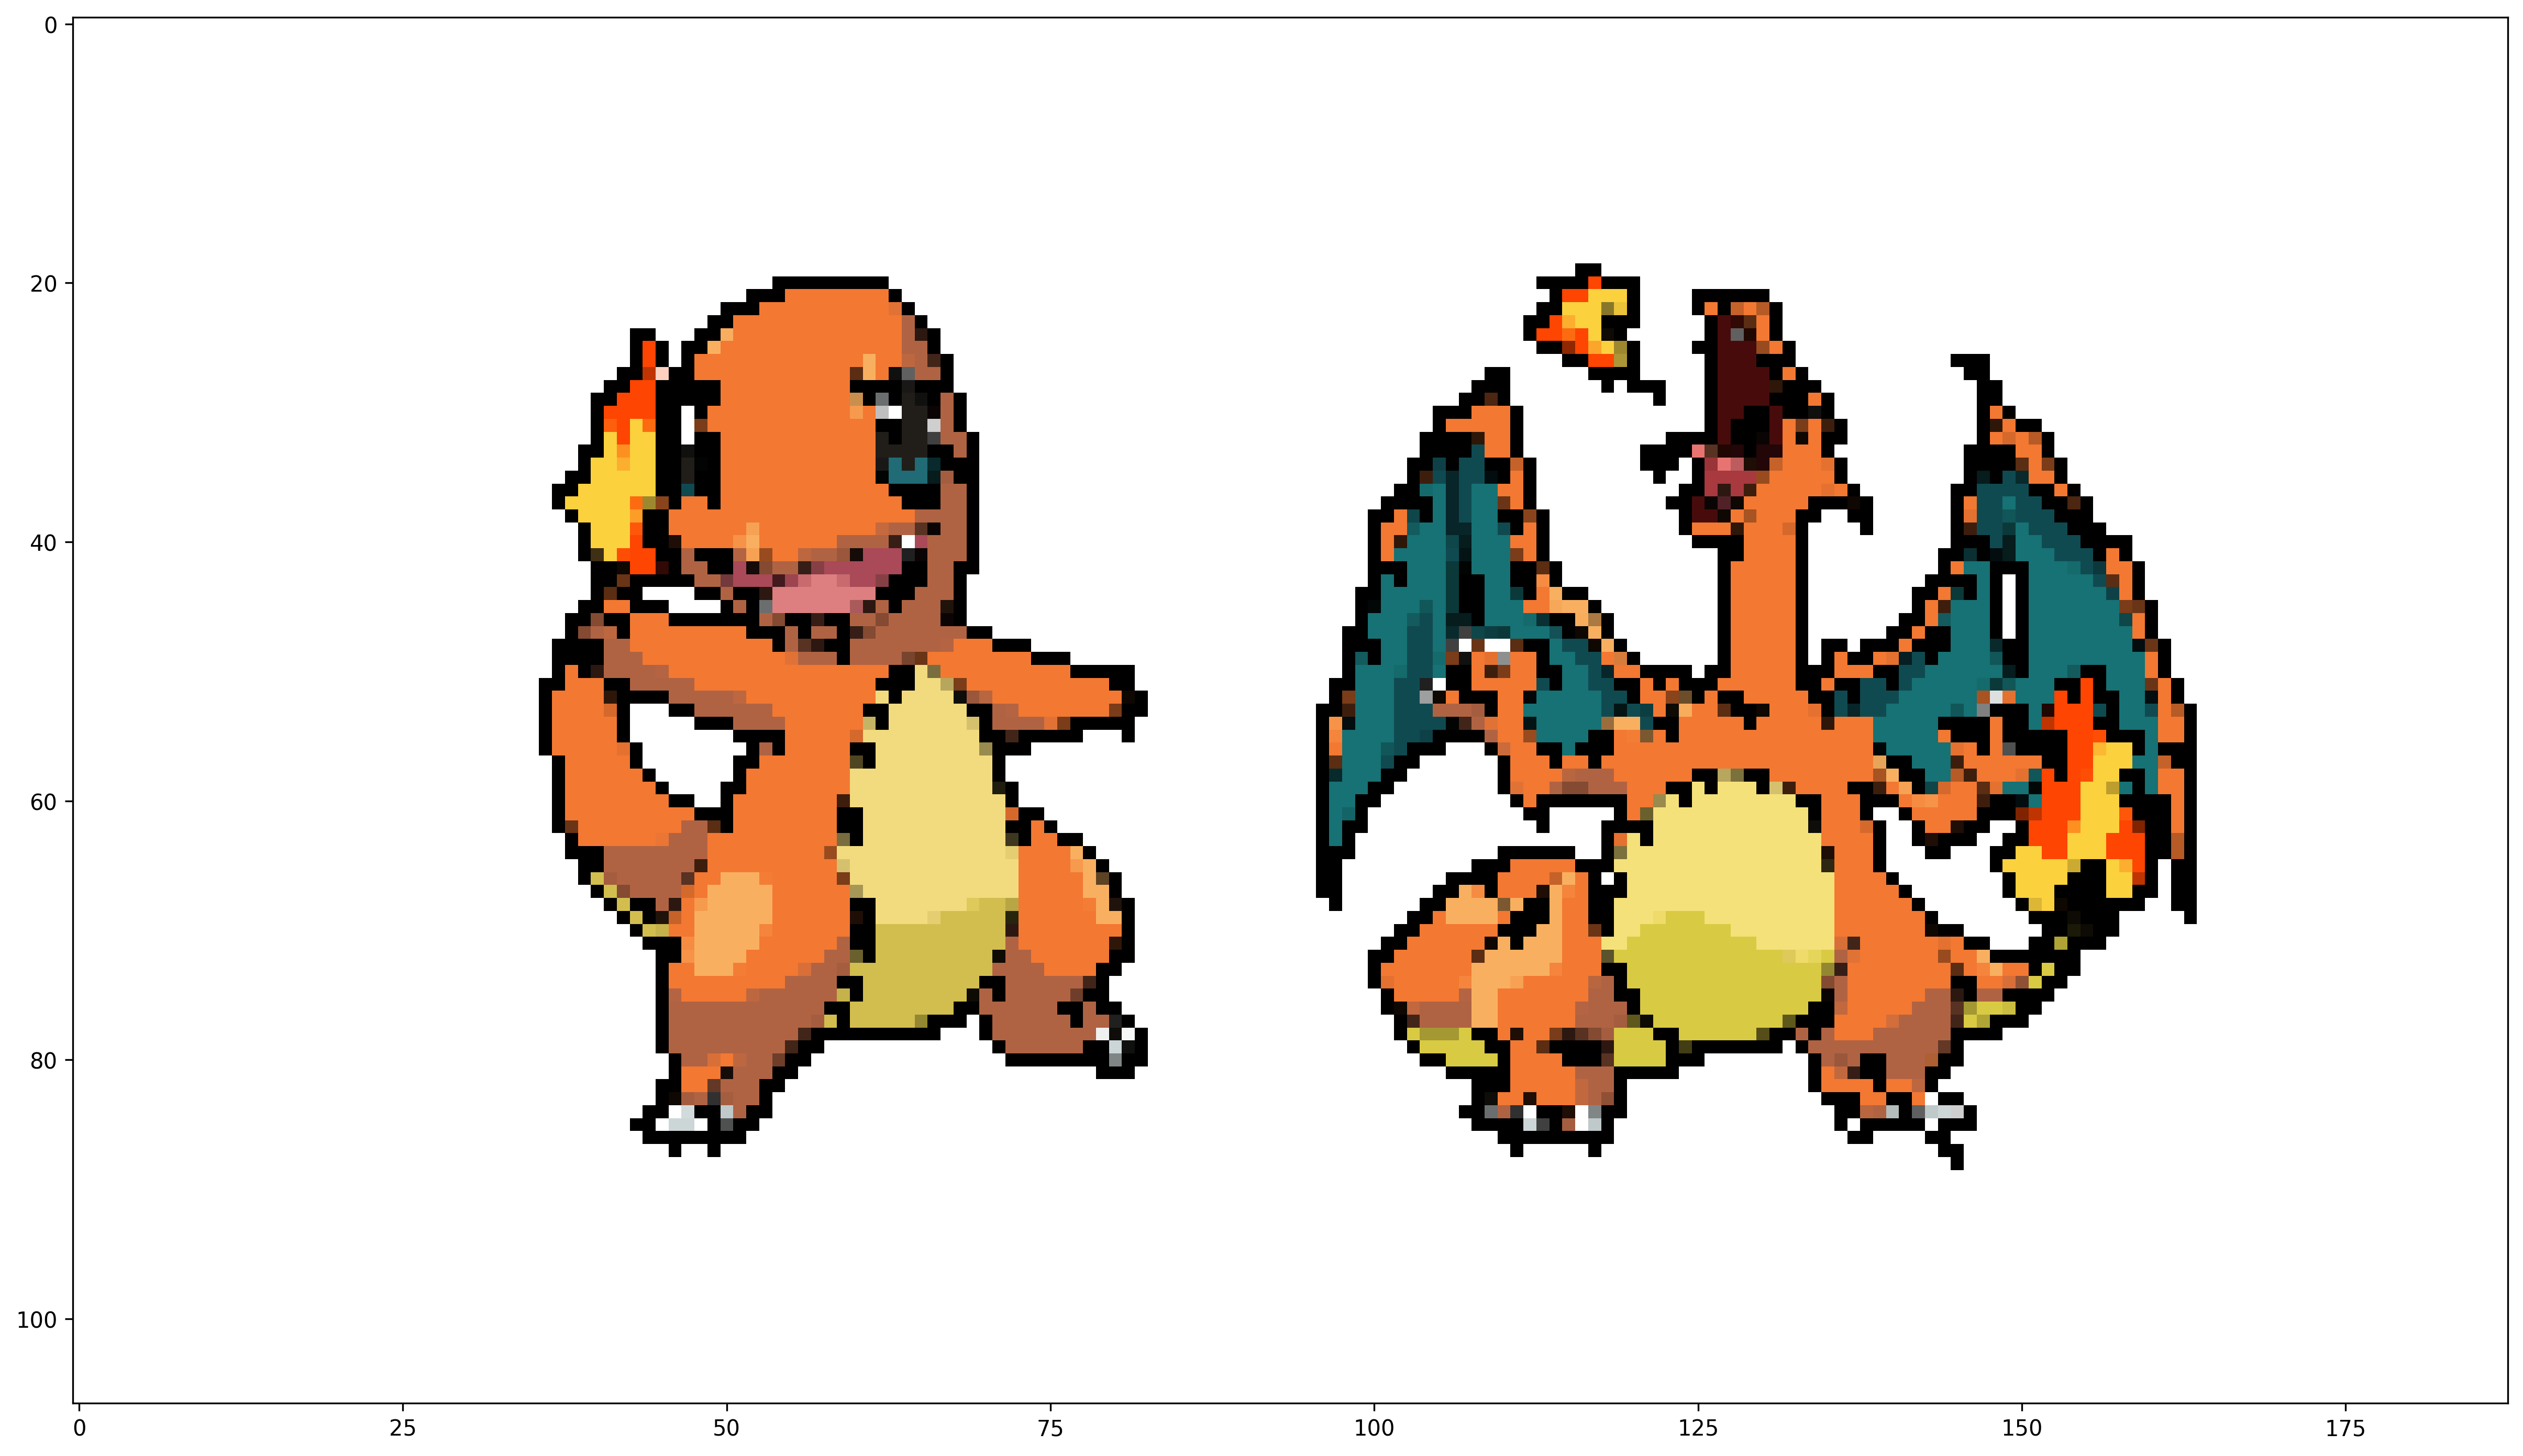

In [32]:
ax, ay = a[:,0], a[:,1] 
bx, by = b[:,0], b[:,1]

rs[ax,ay,0] = 0.
rs[bx,by,0] = 0.

rs[ax,ay,1] = 0.
rs[bx,by,1] = 0.

rs[ax,ay,2] = 0.
rs[bx,by,2] = 0.

rs[ax,ay,3] = 1.
rs[bx,by,3] = 1.

figsize = 20,20
plt.figure(figsize = (20,20),dpi=300)
plt.imshow(rs)